In [97]:
import numpy as np 
import random
import pandas as pd
import os
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from os import listdir
from os.path import isfile, join
import numpy
import cv2

import cv2
import shutil
from glob import glob
import matplotlib.pyplot as plt
import math
%matplotlib inline
print(tf.__version__)

2.2.0


In [98]:
yes_tumor = os.path.join('C:/Users/kzhan/Desktop/yes')
no_tumor = os.path.join('C:/Users/kzhan/Desktop/no')

yes_tumor_Images = glob(os.path.join(yes_tumor, "*.jpg"))
no_tumor_Images = glob(os.path.join(no_tumor, "*.jpg"))
no_tumor_Images.extend(glob(os.path.join(no_tumor, "*.jpg")))

yes = {'class': 'yes',
      'path': yes_tumor,
      'images': yes_tumor_Images}

no = {'class': 'no',
      'path': no_tumor,
      'images': no_tumor_Images}

tumor_containing = len(yes_tumor_Images)
no_tumor_containing = len(no_tumor_Images)

print("Total tumor-containing images: {}".format(len(yes_tumor_Images)))
print("Total non-tumor-containing images: {}".format(len(no_tumor_Images)))

Total tumor-containing images: 154
Total non-tumor-containing images: 182


<Figure size 1800x1800 with 0 Axes>

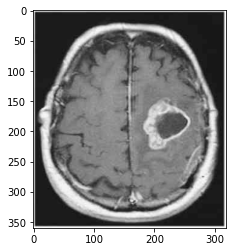

<Figure size 1800x1800 with 0 Axes>

In [99]:
tumor_images = cv2.imread(os.path.join(yes_tumor_Images[1]))
plt.imshow(tumor_images)
plt.figure(figsize = (25,25))

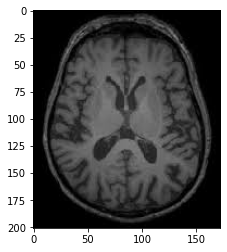

In [100]:
non_tumor_images = cv2.imread(os.path.join(no_tumor_Images[0]))
plt.imshow(non_tumor_images)

In [101]:
train_dir = os.path.join('C:/Users/kzhan/Desktop/Machine Learning Files/train1')
test_dir = os.path.join('C:/Users/kzhan/Desktop/Machine Learning Files/test1')

batch_size = 64
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_tumor = len(os.listdir('C:/Users/kzhan/Desktop/Machine Learning Files/train1/yes'))
train_no_tumor = len(os.listdir('C:/Users/kzhan/Desktop/Machine Learning Files/train1/no'))
test_tumor = len(os.listdir('C:/Users/kzhan/Desktop/Machine Learning Files/test1/yes'))
test_no_tumor = len(os.listdir('C:/Users/kzhan/Desktop/Machine Learning Files/test1/no'))

total_train = train_tumor + train_no_tumor
total_test = test_tumor + test_no_tumor

In [102]:
train_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255) 

In [103]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 253 images belonging to 2 classes.


In [104]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 253 images belonging to 2 classes.


In [105]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape = (IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(2, 2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 20736)           

In [106]:
model2 = Sequential()
model2.add(Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)))
model2.add(MaxPooling2D(2,2))
model2.add(Conv2D(64, 4, padding = 'same', activation = 'relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Flatten())
model2.add(Dense(512, activation = 'relu'))
model2.add(Dense(1))

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 20736)           

In [107]:
model.inputs

[<tf.Tensor 'conv2d_46_input:0' shape=(None, 150, 150, 3) dtype=float32>]

In [108]:
model.outputs

[<tf.Tensor 'dense_27/Identity:0' shape=(None, 1) dtype=float32>]

In [109]:
model.get_weights()

[array([[[[ 5.96237630e-02, -2.49200538e-02,  8.34432393e-02,
            2.48136818e-02, -3.14354524e-02,  8.74750465e-02,
            9.85719860e-02,  1.20149598e-01,  4.26916927e-02,
            3.64518762e-02,  1.64284259e-02, -3.10161486e-02,
            1.21715561e-01,  5.75763136e-02, -2.06208006e-02,
           -1.90189257e-02,  1.03323892e-01,  1.04524821e-01,
            8.45723450e-02, -1.00012571e-01, -1.34873688e-01,
            1.36530206e-01,  9.19325799e-02, -3.92821431e-03,
           -1.06458440e-01, -1.31719261e-02, -9.49871987e-02,
           -7.02118278e-02, -9.17188227e-02,  5.62424511e-02,
            1.12521812e-01, -5.69579378e-02],
          [ 1.22481212e-01, -1.06521785e-01,  6.02518767e-02,
            4.07795608e-02, -7.59071708e-02, -1.35311812e-01,
            4.75196987e-02,  9.73589271e-02,  1.23956546e-01,
            3.72007191e-02, -3.50727960e-02,  1.02821633e-01,
            4.84469235e-02, -1.78234279e-02,  3.52650881e-02,
            9.27702039e-

In [110]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [111]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=test_data_gen ,
    validation_steps=total_test // batch_size
)

Epoch 1/15
3/3 [==============================] - 2s 732ms/step - loss: 1.0091 - accuracy: 0.5781 - val_loss: 1.0426 - val_accuracy: 0.3750
Epoch 2/15
3/3 [==============================] - 2s 766ms/step - loss: 0.7461 - accuracy: 0.4656 - val_loss: 0.5292 - val_accuracy: 0.7760
Epoch 3/15
3/3 [==============================] - 2s 770ms/step - loss: 0.5713 - accuracy: 0.7460 - val_loss: 0.5634 - val_accuracy: 0.6354
Epoch 4/15
3/3 [==============================] - 2s 731ms/step - loss: 0.5446 - accuracy: 0.6667 - val_loss: 0.4884 - val_accuracy: 0.7917
Epoch 5/15
3/3 [==============================] - 2s 790ms/step - loss: 0.4902 - accuracy: 0.7812 - val_loss: 0.5073 - val_accuracy: 0.7917
Epoch 6/15
3/3 [==============================] - 2s 799ms/step - loss: 0.5227 - accuracy: 0.7778 - val_loss: 0.4922 - val_accuracy: 0.7188
Epoch 7/15
3/3 [==============================] - 3s 876ms/step - loss: 0.4702 - accuracy: 0.7460 - val_loss: 0.4507 - val_accuracy: 0.7500
Epoch 8/15
3/3 [====

In [112]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os

In [113]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [114]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [115]:
from keras.models import load_model
import cv2
import numpy as np

loaded_model = loaded_model

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

img = cv2.imread('220px-Normal_axial_T2-weighted_MR_image_of_the_brain.jpg')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])

classes = model.predict_classes(img)

print(classes)

[[0]]
